In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE

import plotly.express as px


In [2]:
df = pd.read_csv ('Telco_Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
duplicateRows = df[df.duplicated()]
duplicateRows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [5]:
print(df["gender"].value_counts(),end="\n==========================\n")
print(df["SeniorCitizen"].value_counts(),end="\n==========================\n")
print(df["Partner"].value_counts(),end="\n==========================\n")
print(df["Dependents"].value_counts(),end="\n==========================\n")
print(df["PhoneService"].value_counts(),end="\n==========================\n")
print(df["MultipleLines"].value_counts(),end="\n==========================\n")
print(df["InternetService"].value_counts(),end="\n==========================\n")
print(df["OnlineSecurity"].value_counts(),end="\n==========================\n")
print(df["OnlineBackup"].value_counts(),end="\n==========================\n")
print(df["DeviceProtection"].value_counts(),end="\n==========================\n")
print(df["TechSupport"].value_counts(),end="\n==========================\n")
print(df["StreamingTV"].value_counts(),end="\n==========================\n")
print(df["StreamingMovies"].value_counts(),end="\n==========================\n")
print(df["Contract"].value_counts(),end="\n==========================\n")
print(df["PaperlessBilling"].value_counts(),end="\n==========================\n")
print(df["PaymentMethod"].value_counts(),end="\n==========================\n")
print(df["Churn"].value_counts(),end="\n==========================\n")


Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

## Data Preparation

In [6]:
df2 = pd.get_dummies(data=df,columns=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   object 
 5   Churn                                    7043 non-null   object 
 6   gender_Female                            7043 non-null   uint8  
 7   gender_Male                              7043 non-null   uint8  
 8   Partner_No                               7043 non-null   uint8  
 9   Partner_Yes                              7043 non-null   uint8  
 10  Dependents_No                            7043 no

In [7]:
total_col = df2[['TotalCharges']].replace(" ",None)
df2["TotalCharges"] = total_col
df2["TotalCharges"] = df2["TotalCharges"].astype(float)

In [8]:
df2.dropna(inplace=True)
df2

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,No,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,No,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,Yes,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [9]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(df2["Churn"])
encoded_labels

df2["Churn"] = encoded_labels


## Data Analysis And Visualization

<AxesSubplot:ylabel='Churn'>

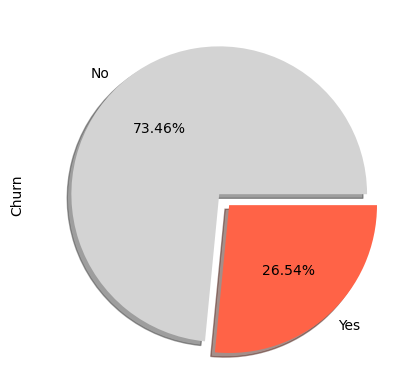

In [10]:
df["Churn"].value_counts().plot(kind="pie",colors=["lightgray","tomato"],explode = (0, 0.1),shadow=True,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x19609395b80>,
 [Text(1.099986758671056, 0.005397290833723815, 'Null'),
  Text(-1.1999855546554705, -0.0058880063012065175, 'Not Null')],
 [Text(0.5999927774569397, 0.0029439768183948077, '0.16%'),
  Text(-0.6999915735490243, -0.0034346703423704683, '99.84%')])

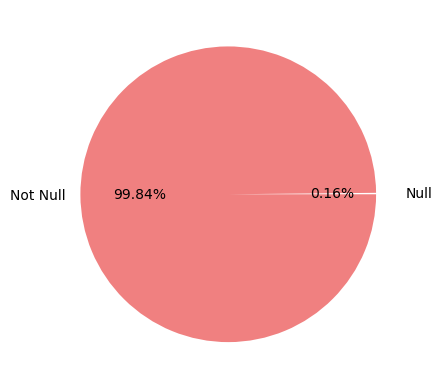

In [11]:
count_of_null = df[df["TotalCharges"] == " "].shape[0]
count_non_null = df.shape[0] - count_of_null

plt.pie([count_of_null/7043,count_non_null/7043],explode=(0, 0.1),labels=["Null","Not Null"],autopct='%1.2f%%',
        colors=["white","lightcoral"])


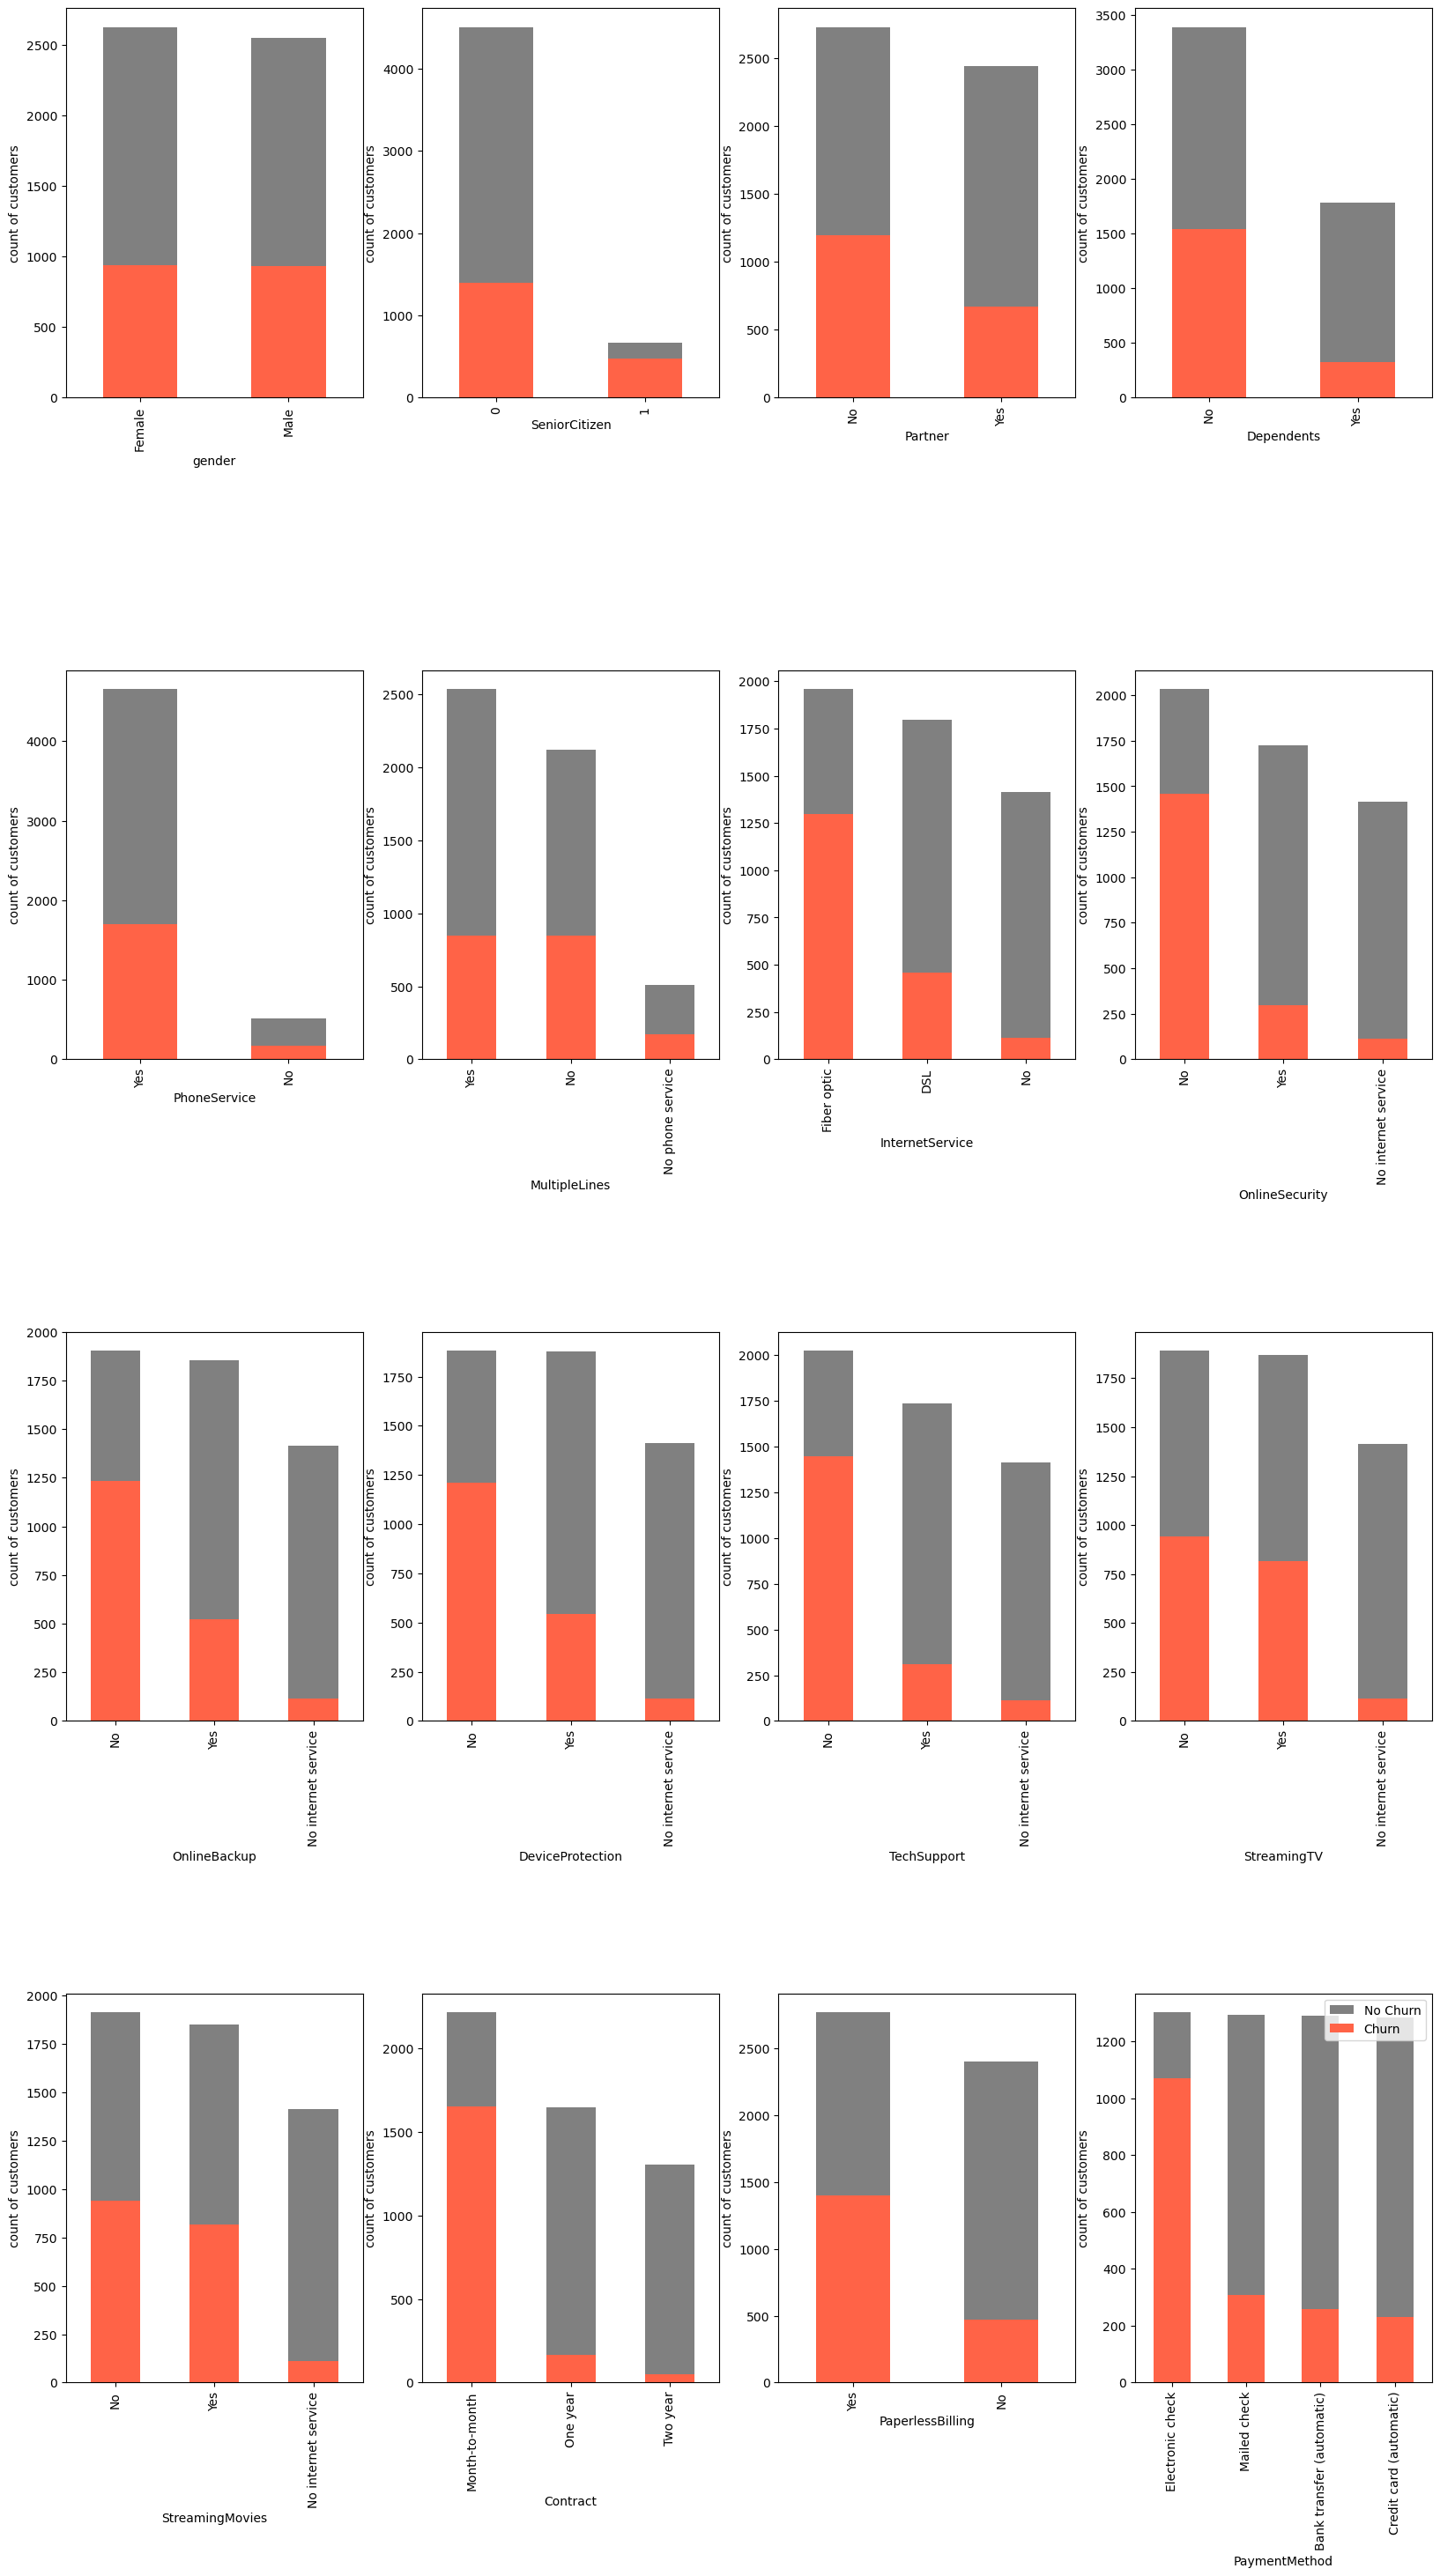

In [12]:
categorical_features = [ "gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod" ]
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(20,35))
row, col = 0,0

for i, categorical_feature in enumerate(categorical_features):
 if col == COLS - 1: row += 1
 col = i % COLS
 df[df.Churn=='No'][categorical_feature].value_counts().plot(kind = 'bar',stacked=True , ax=ax[row,col] , color ='gray' , xlabel= categorical_feature , ylabel = 'count of customers')
 df[df.Churn=='Yes' ][categorical_feature].value_counts().plot(kind = 'bar',stacked=True, ax=ax[row,col] , color = 'tomato')
 plt.legend(['No Churn', 'Churn'])
 fig.subplots_adjust(hspace=0.7)


Text(0.5, 1.0, "Tenure Distribution Of Customers Who Didn't Churn")

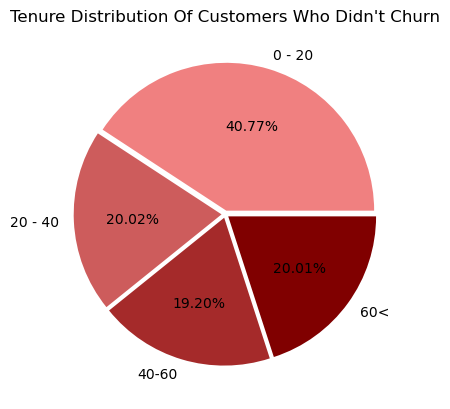

In [36]:
one_cat = df2[df2["tenure"]<=20].shape[0] # 0-20
one_cat

two_cat = df2[(df2["tenure"]>20) & (df2["tenure"]<=40)].shape[0]
two_cat

three_cat = df2[(df2["tenure"]>40) & (df2["tenure"]<=60)].shape[0]
three_cat

four_cat = df2[(df2["tenure"]>60)].shape[0]
four_cat

vals = np.array([one_cat,two_cat,three_cat,four_cat])

plt.pie(x=vals,colors=["lightcoral","indianred","brown","maroon"],labels=["0 - 20","20 - 40","40-60","60<"],explode=[0.025,0.025,0.025,0.025],autopct='%1.2f%%')
plt.title("Tenure Distribution Of Customers Who Didn't Churn")

In [14]:
num_cols = df2[["tenure","MonthlyCharges","TotalCharges"]]
num_cols.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<AxesSubplot:>

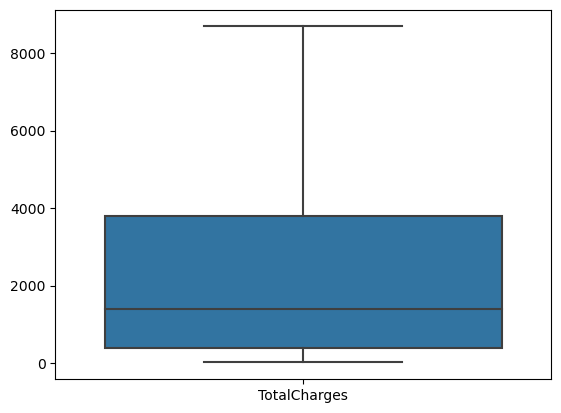

In [15]:
# sns.set_style("darkgrid")
box_data = df2[["TotalCharges"]]
sns.boxplot(data=box_data)

<AxesSubplot:>

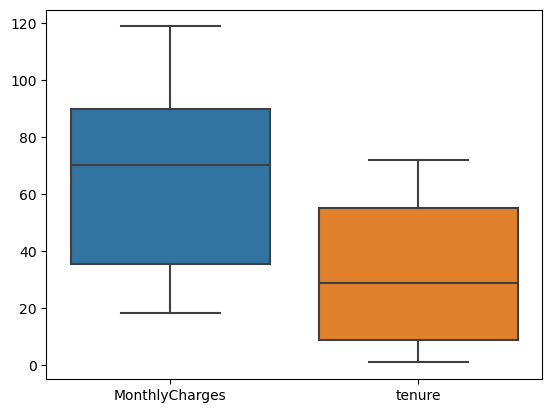

In [16]:
# sns.set_style("darkgrid")
box_data = df2[["MonthlyCharges","tenure"]]
sns.boxplot(data=box_data)

Text(0.5, 0, 'amount of correlation to churn column')

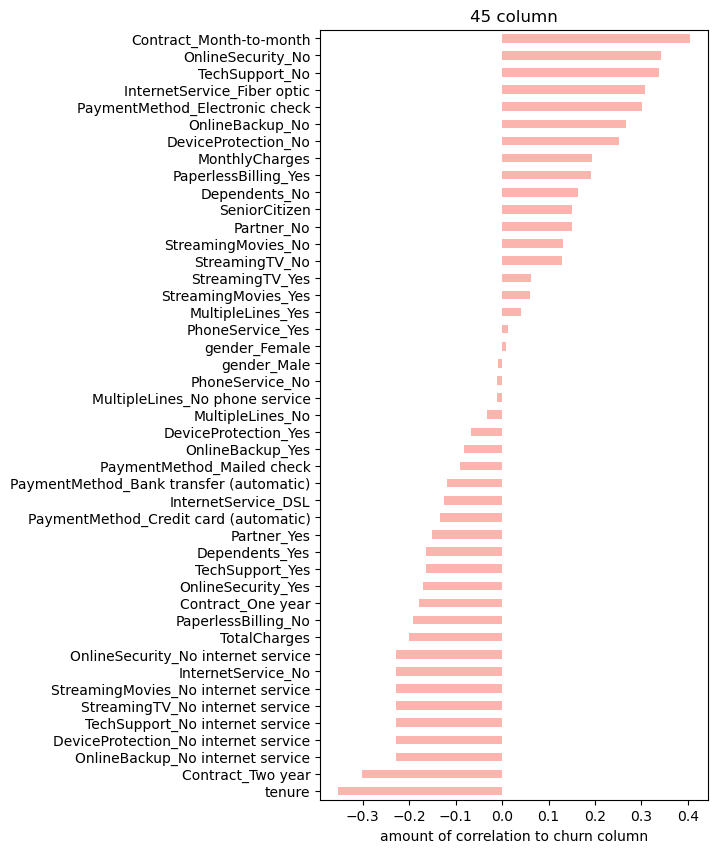

In [17]:
#We have 46 column (without customerID) and we want to see their corllation to the churn column to get more information about the data
# corrolation matrix

new_df = df2.drop(["customerID"],axis=1)
new_df

corr = new_df.corr()["Churn"]
corr = corr.drop("Churn")
corr = corr.sort_values(ascending=True)

# sns.set_style("darkgrid")

corr.plot(kind="barh",figsize=(5,10),colormap="Pastel1",title="45 column")
plt.xlabel("amount of correlation to churn column")


## Correlation Between Some Features

Text(0.5, 0, 'amount of correlation to online backup')

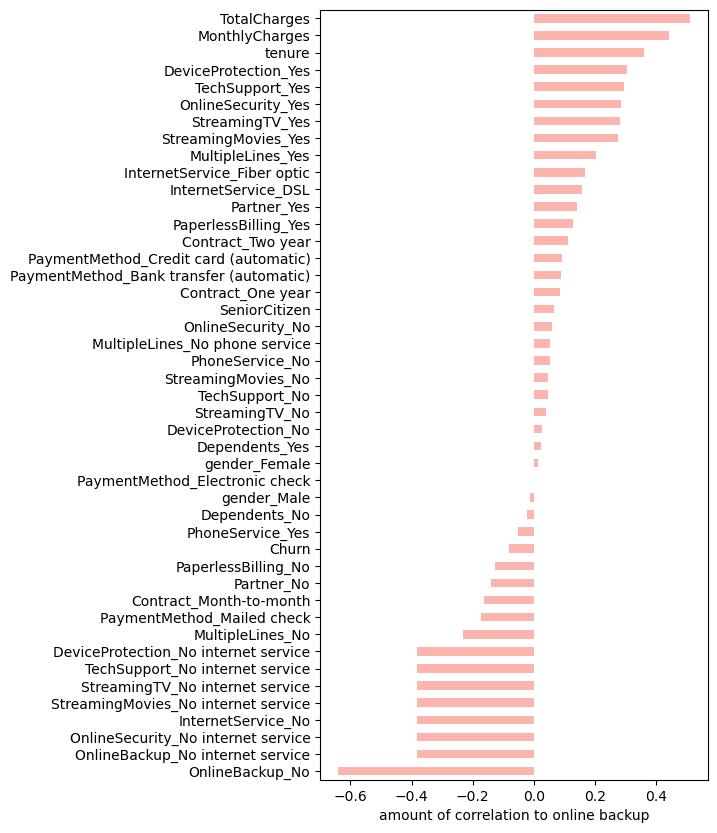

In [18]:
##corr online backup  to see if theres some correlation between it and the Online Security

online_sec_yes = new_df.corr()["OnlineBackup_Yes"]
online_sec_yes


corr5 = online_sec_yes.drop("OnlineBackup_Yes")
corr5 = corr5.sort_values(ascending=True)


corr5.plot(kind="barh",figsize=(5,10),colormap="Pastel1")
plt.xlabel("amount of correlation to online backup")

# we can see that we can remove the OnlineBackup_No feature

Text(0.5, 0, 'amount of correlation to streaming tv')

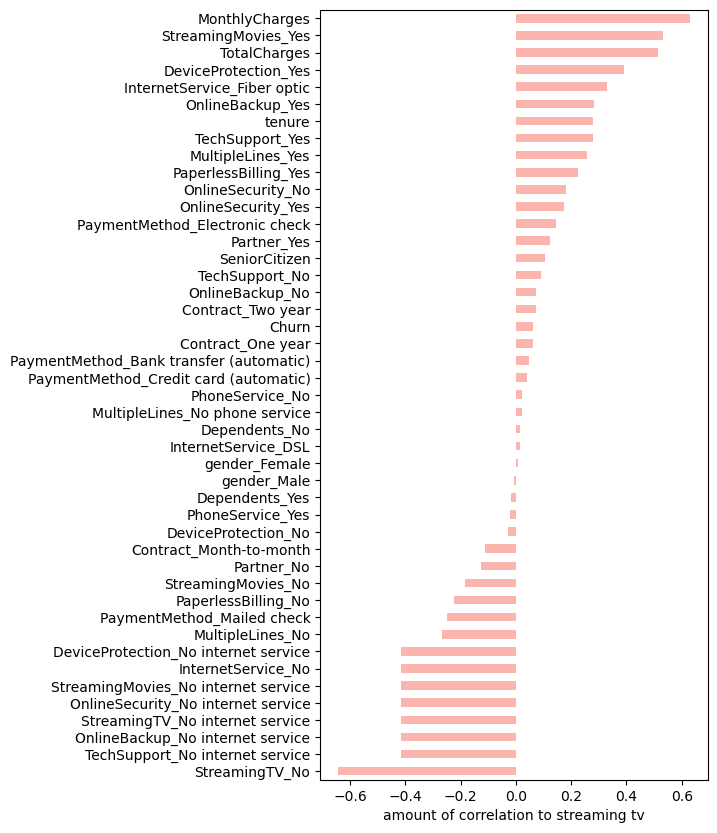

In [19]:
##corr streaming tv s to see if theres some correlation between it and the streaming movies

stream_tv_yes = new_df.corr()["StreamingTV_Yes"]
stream_tv_yes


corr6 = stream_tv_yes.drop("StreamingTV_Yes")
corr6 = corr6.sort_values(ascending=True)



corr6.plot(kind="barh",figsize=(5,10),colormap="Pastel1")
plt.xlabel("amount of correlation to streaming tv")

# we can see that we can remove the StreamingTV_No feature

## Hypothesis Generation

([<matplotlib.patches.Wedge at 0x1960b041ac0>,
 [Text(0.9294044839370518, 0.5883938351459016, 'Will Churn'),
  Text(-1.013895800658602, -0.641884183795529, "Won't Churn")],
 [Text(0.5069479003293009, 0.3209420918977645, '17.97%'),
  Text(-0.5914392170508512, -0.37443244054739194, '82.03%')])

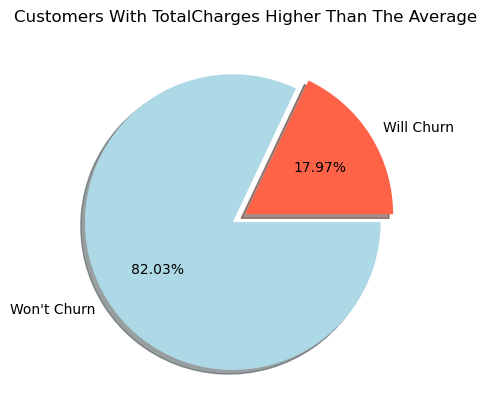

In [20]:
# Hypothesis 1
# customers with TotalCharges higher than the average tend to churn more

selected_yes_rows = new_df[(new_df["TotalCharges"]>2283.300441) & (new_df["Churn"]==1)].shape[0]
selected_no_rows = new_df[(new_df["TotalCharges"]>2283.300441) & (new_df["Churn"]==0)].shape[0]
total_count = selected_yes_rows + selected_no_rows


plt.title("Customers With TotalCharges Higher Than The Average")
plt.pie([selected_yes_rows/total_count,selected_no_rows/total_count],colors=["tomato","lightblue"],labels=["Will Churn","Won't Churn"],explode = (0, 0.1),shadow=True,autopct='%1.2f%%')


([<matplotlib.patches.Wedge at 0x1960b1d35e0>,
 [Text(0.37947946712131453, 1.03247050032111, 'Will Churn'),
  Text(-0.41397749504121634, -1.1263314936551319, "Won't Churn")],
 [Text(0.2069888002479897, 0.5631657274478782, '38.79%'),
  Text(-0.24148687210737618, -0.6570267046321601, '61.21%')])

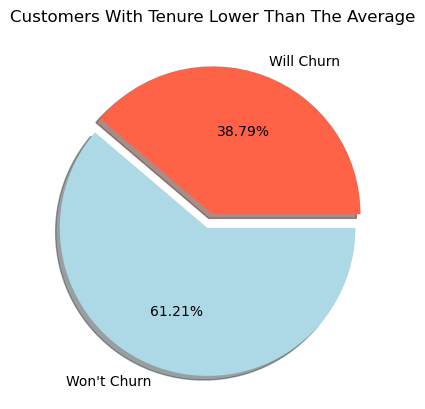

In [21]:
# Hypothesis 2
# customers with tenure less than the average tend to churn more

selected_yes_rows2 = new_df[(new_df["tenure"]<32.421786) & (new_df["Churn"]==1)].shape[0]
selected_no_rows2 = new_df[(new_df["tenure"]<32.421786) & (new_df["Churn"]==0)].shape[0]
total_count2 = selected_no_rows2 + selected_yes_rows2

plt.title("Customers With Tenure Lower Than The Average")
plt.pie([selected_yes_rows2/total_count2,selected_no_rows2/total_count2],colors=["tomato","lightblue"],labels=["Will Churn","Won't Churn"],explode = (0, 0.1),shadow=True,autopct='%1.2f%%')


([<matplotlib.patches.Wedge at 0x1960b0ab040>,
 [Text(1.0955979475127853, 0.09831143069741317, 'Will Churn'),
  Text(-1.195197768454056, -0.10724874956121887, "Won't Churn")],
 [Text(0.5975988804615192, 0.05362441674404355, '2.85%'),
  Text(-0.6971986982648659, -0.06256177057737766, '97.15%')])

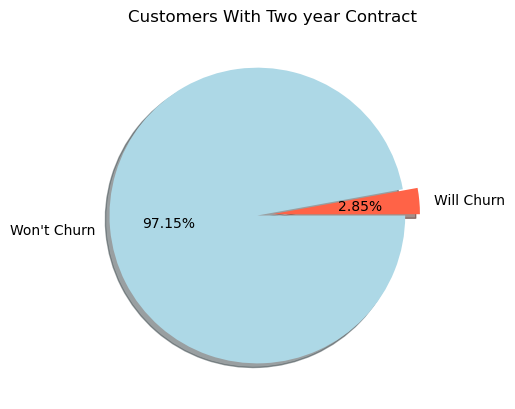

In [22]:
# Hypothesis 3
# The longer the contract duration the less likely it is that the customer will churn 


selected_yes_rows3 = new_df[(new_df["Contract_Two year"] == 1) & (new_df["Churn"]==1)].shape[0]
selected_no_rows3 = new_df[(new_df["Contract_Two year"] == 1) & (new_df["Churn"]==0)].shape[0]
total_count3 = selected_yes_rows3 + selected_no_rows3

plt.title("Customers With Two year Contract")
plt.pie([selected_yes_rows3/total_count3,selected_no_rows3/total_count3],colors=["tomato","lightblue"],labels=["Will Churn","Won't Churn"],explode = (0, 0.1),shadow=True,autopct='%1.2f%%')





## Feature Engineering

In [23]:
y = new_df["Churn"]
x = new_df.drop(["Churn"],axis=1)

In [24]:
# feature reduction
selector1 = SelectKBest(mutual_info_classif,k=25)

In [25]:
new_x = selector1.fit_transform(x,y)
new_x

new_x.shape

(7032, 25)

In [26]:
features = selector1.get_feature_names_out()
features

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'Dependents_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype=object)

Text(0.5, 0, 'amount of correlation to churn column')

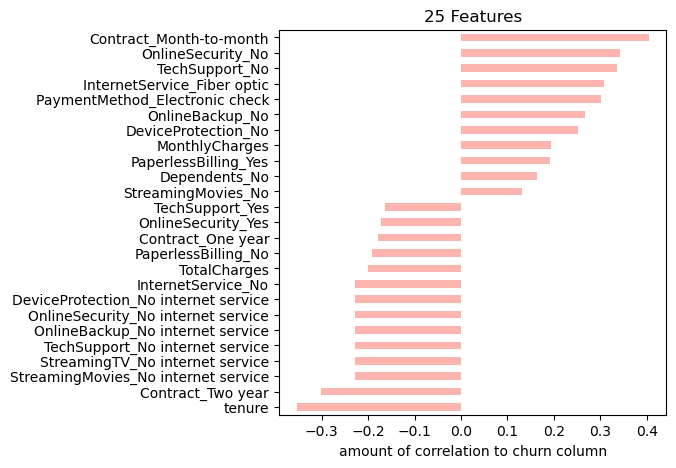

In [27]:
# visualizing the outputed features (25) to see the  correlation
corr2 = corr[features].sort_values(ascending=True)
corr2.plot(kind = "barh",figsize=(5,5),colormap="Pastel1",title="25 Features")
plt.xlabel("amount of correlation to churn column")


In [28]:
# creating a new selector to do more feature extraction (15 features)
selector2 = SelectKBest(mutual_info_classif,k=15)

In [29]:
new_x2 = selector2.fit_transform(x,y)
new_x2.shape

(7032, 15)

In [30]:
features2 = selector2.get_feature_names_out()
features2

array(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype=object)

Text(0.5, 0, 'amount of correlation to churn column')

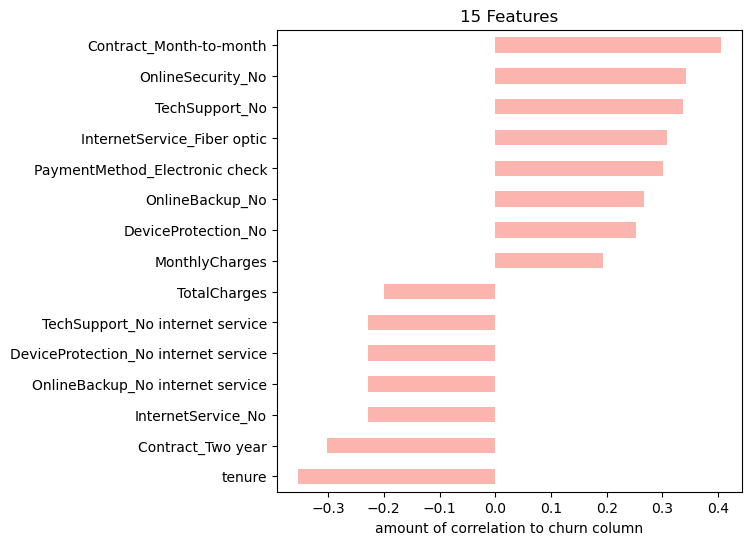

In [31]:
corr3 = corr[features2].sort_values(ascending=True)
corr3.plot(kind = "barh",figsize=(6,6),colormap="Pastel1",title="15 Features")
plt.xlabel("amount of correlation to churn column")


In [37]:
fig = px.box(df, x = 'Churn'  , y='MonthlyCharges')
fig.show()

In [33]:
fig = px.box(df, x = 'Churn'  , y='tenure')
fig.show()

In [34]:
fig = px.box(df, x = 'Churn'  , y='TotalCharges')
fig.show()